In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('aw_fb_data.csv')
print(df.head())

   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null   float64
 10  entropy_heart         6264 non-null   float64
 11  entropy_setps         6264 non-null   float64
 12  resting_heart         6264 non-null   float64
 13  corr_heart_steps      6264 non-null   float64
 14  norm_heart            6264 non-null   float64
 15  intensity_karvonen   

In [4]:
print(df.isnull().sum())

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


In [5]:
print(df.describe())

        Unnamed: 0           X1          age       gender       height  \
count  6264.000000  6264.000000  6264.000000  6264.000000  6264.000000   
mean   3132.500000  1771.144317    29.158525     0.476533   169.709052   
std    1808.405375  1097.988748     8.908978     0.499489    10.324698   
min       1.000000     1.000000    18.000000     0.000000   143.000000   
25%    1566.750000   789.750000    23.000000     0.000000   160.000000   
50%    3132.500000  1720.000000    28.000000     0.000000   168.000000   
75%    4698.250000  2759.250000    33.000000     1.000000   180.000000   
max    6264.000000  3670.000000    56.000000     1.000000   191.000000   

            weight        steps    hear_rate     calories     distance  \
count  6264.000000  6264.000000  6264.000000  6264.000000  6264.000000   
mean     69.614464   109.562268    86.142331    19.471823    13.832555   
std      13.451878   222.797908    28.648385    27.309765    45.941437   
min      43.000000     1.000000     2

In [6]:
# Dropping unnecessary columns
df.drop(columns=['Unnamed: 0', 'X1'], inplace=True)

Exploratory Data Analysis

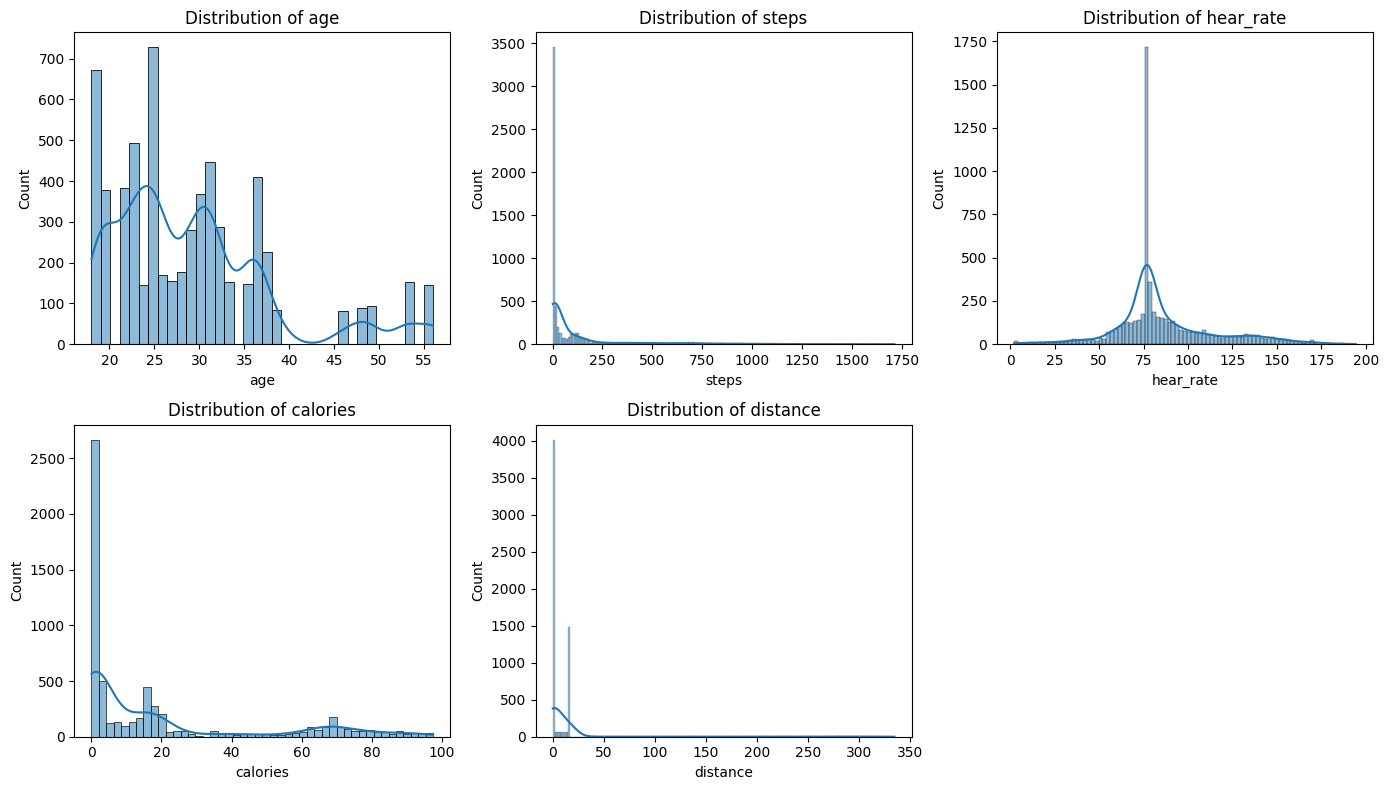

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for i, column in enumerate(['age', 'steps', 'hear_rate', 'calories', 'distance']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

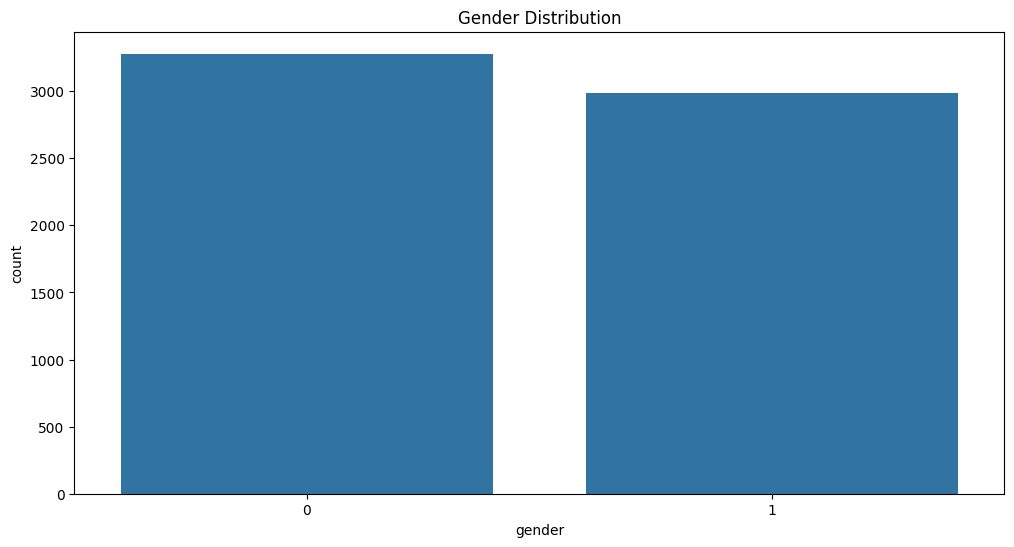

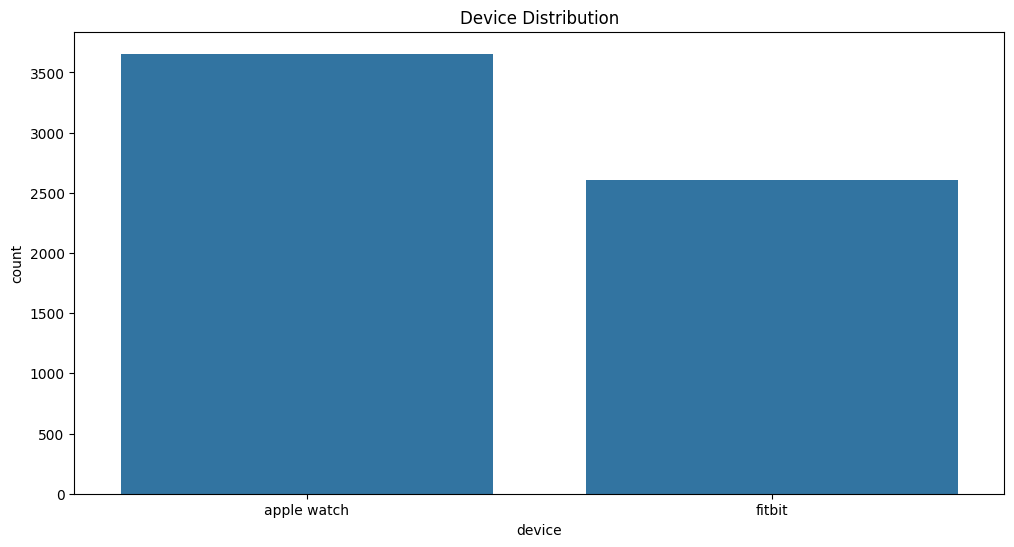

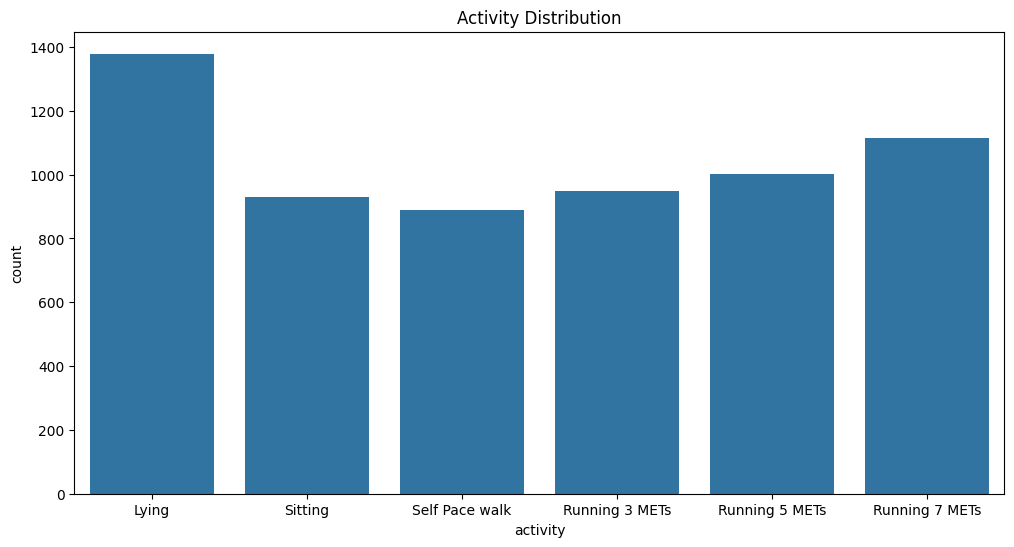

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='device')
plt.title('Device Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='activity')
plt.title('Activity Distribution')
plt.show()

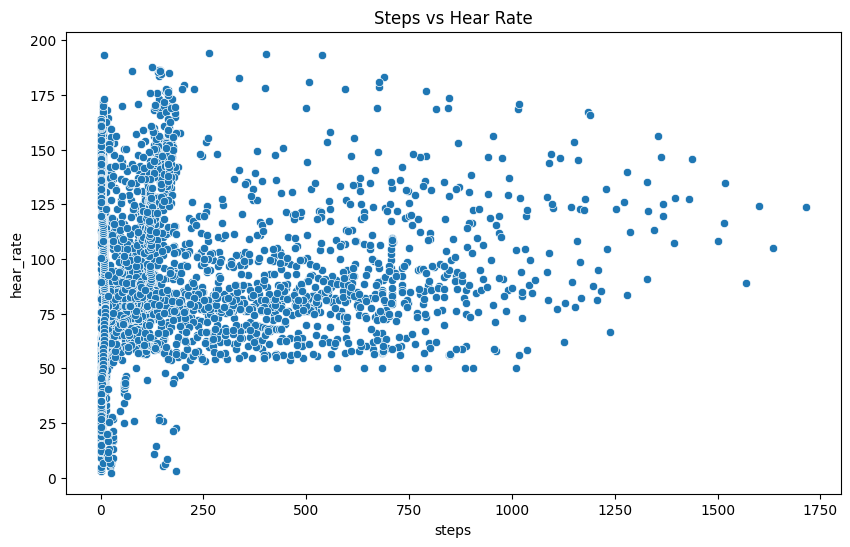

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='steps', y='hear_rate')
plt.title('Steps vs Hear Rate')
plt.show()

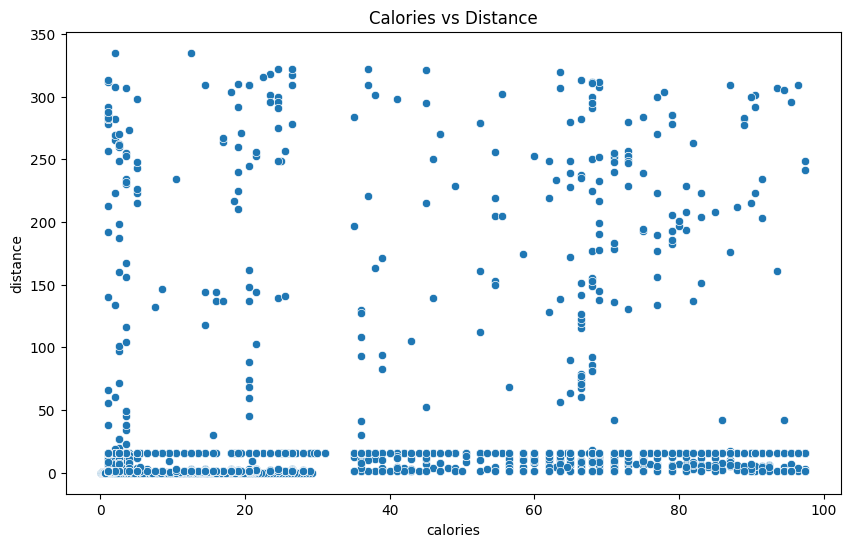

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calories', y='distance')
plt.title('Calories vs Distance')
plt.show()


In [7]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


Numerical columns: Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'entropy_heart', 'entropy_setps', 'resting_heart',
       'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart',
       'steps_times_distance'],
      dtype='object')
Categorical columns: Index(['device', 'activity'], dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [13]:
print(df['activity'].head())


0    Lying
1    Lying
2    Lying
3    Lying
4    Lying
Name: activity, dtype: object


Classification Target

In [19]:
y_classification = df['activity']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_classification_encoded = label_encoder.fit_transform(y_classification)

print(f"y_classification shape: {y_classification_encoded.shape}")
print(f"Unique activity classes: {label_encoder.classes_}")

y_classification shape: (6264,)
Unique activity classes: ['Lying' 'Running 3 METs' 'Running 5 METs' 'Running 7 METs'
 'Self Pace walk' 'Sitting']


Train a Regression Model to Predict Workout Intensity

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X_regression = df[['age', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'norm_heart']]
y_regression = df['intensity_karvonen']


print(f"X_regression shape: {X_regression.shape}")
print(f"y_regression shape: {y_regression.shape}")


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


regressor = RandomForestRegressor(n_estimators=100, random_state=42)

regressor.fit(X_train_reg, y_train_reg)


y_pred_reg = regressor.predict(X_test_reg)


mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error for Intensity Prediction: {mse}")


X_regression shape: (6264, 7)
y_regression shape: (6264,)
Mean Squared Error for Intensity Prediction: 0.0011848210043396304


Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_regression = df[['age', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'norm_heart']]
y_regression = df['intensity_karvonen']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


linear_regressor = LinearRegression()


linear_regressor.fit(X_train_reg, y_train_reg)


y_pred_reg = linear_regressor.predict(X_test_reg)


mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error for Intensity Prediction: {mse}")
print(f"R² Score for Intensity Prediction: {r2}")


Mean Squared Error for Intensity Prediction: 0.04274881107661606
R² Score for Intensity Prediction: 0.9552763751165673


Train a Classification Model to Predict Workout Type

In [20]:

X_classification = df[['age', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'norm_heart']]
y_classification = y_classification_encoded


print(f"X_classification shape: {X_classification.shape}")
print(f"y_classification shape: {y_classification.shape}")


X_classification shape: (6264, 7)
y_classification shape: (6264,)


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(X_train_clf, y_train_clf)

y_pred_clf = classifier.predict(X_test_clf)


In [23]:
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy for Workout Type Prediction: {accuracy}")

report = classification_report(y_test_clf, y_pred_clf, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


Accuracy for Workout Type Prediction: 0.8379888268156425
Classification Report:
                precision    recall  f1-score   support

         Lying       0.80      0.84      0.82       273
Running 3 METs       0.84      0.84      0.84       175
Running 5 METs       0.83      0.85      0.84       208
Running 7 METs       0.92      0.89      0.90       235
Self Pace walk       0.87      0.87      0.87       178
       Sitting       0.77      0.73      0.75       184

      accuracy                           0.84      1253
     macro avg       0.84      0.84      0.84      1253
  weighted avg       0.84      0.84      0.84      1253



Generating Fitness Plan

In [24]:
def generate_fitness_plan(user_data):
    
    intensity_prediction = regressor.predict([user_data])
    
    
    workout_type_prediction = classifier.predict([user_data])
    
    
    return {
        'Workout Intensity': intensity_prediction[0],
        'Workout Type': label_encoder.inverse_transform([workout_type_prediction[0]])[0]
    }


In [29]:
def get_user_input():
    age = int(input("Enter your age: "))
    weight = float(input("Enter your weight in kg: "))
    steps = float(input("Enter average daily steps: "))
    heart_rate = float(input("Enter your average heart rate: "))
    calories = float(input("Enter daily calories burned: "))
    distance = float(input("Enter average distance walked (in km): "))
    norm_heart = float(input("Enter normalized heart rate: "))
    
    
    user_data = [age, weight, steps, heart_rate, calories, distance, norm_heart]
    
    return user_data


def generate_fitness_plan(user_data):
    
    
    intensity_prediction = regressor.predict([user_data])
    
    
    workout_type_prediction = classifier.predict([user_data])
    
    
    return {
        'Workout Intensity': intensity_prediction[0],
        'Workout Type': label_encoder.inverse_transform([workout_type_prediction[0]])[0]
    }


if __name__ == "__main__":
    user_data = get_user_input()
    
   
    fitness_plan = generate_fitness_plan(user_data)
    
    
    print("\nGenerated Fitness Plan:")
    print(f"Workout Intensity: {fitness_plan['Workout Intensity']}")
    print(f"Workout Type: {fitness_plan['Workout Type']}")



Generated Fitness Plan:
Workout Intensity: 4.770098749505864
Workout Type: Running 5 METs


C:\Users\aanch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\aanch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
